### Note -
Here we have used cosine similarity but we also have option to use linear_kernal, sigmoid_kernal and KNearesNeighbour as well.

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [169]:
books = pd.read_csv("Books.csv")
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("ratings.csv")

In [170]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [171]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [172]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [173]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [174]:
books.drop(['Publisher','Image-URL-S','Image-URL-L'],axis=1,inplace=True)

In [175]:
books.duplicated().sum()

0

In [176]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [177]:
users.drop('Age',axis=1,inplace=True)

In [178]:
users.duplicated().sum()

0

In [179]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [180]:
ratings.duplicated().sum()

0

In [181]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 5)
(278858, 2)
(1149780, 3)


## EDA

In [182]:
# Total number of users
users['User-ID'].count()

278858

In [183]:
# Total users who rated books
ratings['User-ID'].drop_duplicates().count()

105283

In [184]:
# Total number of books
books['ISBN'].drop_duplicates().count()

271360

In [185]:
# Total number of books that are rated
ratings['ISBN'].drop_duplicates().count()

340556

In [186]:
# Top 5 User Based on Rating Count
top_users = ratings.groupby('User-ID').agg({
    'Book-Rating': 'count'
}).sort_values('Book-Rating', ascending=False)[:10]
top_users.reset_index(inplace=True)
top_users

,User-ID,Book-Rating
0,11676,13602
1,198711,7550
2,153662,6109
3,98391,5891
4,35859,5850
5,212898,4785
6,278418,4533
7,76352,3367
8,110973,3100
9,235105,3067


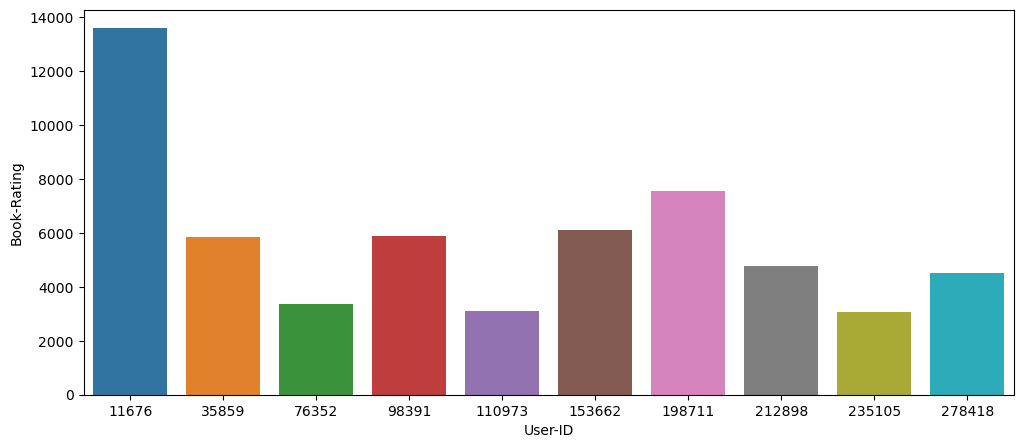

In [187]:
plt.figure(figsize=(12,5))
sns.barplot(top_users,x='User-ID',y='Book-Rating')
plt.show()

In [188]:
book_rating = ratings.groupby('ISBN').agg({'Book-Rating':['mean','count']})
book_rating.columns = ['Average Rating','Num Rating']
book_rating = book_rating.sort_values(['Num Rating'],ascending=False)

In [189]:
book_rating.head()

,Average Rating,Num Rating
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


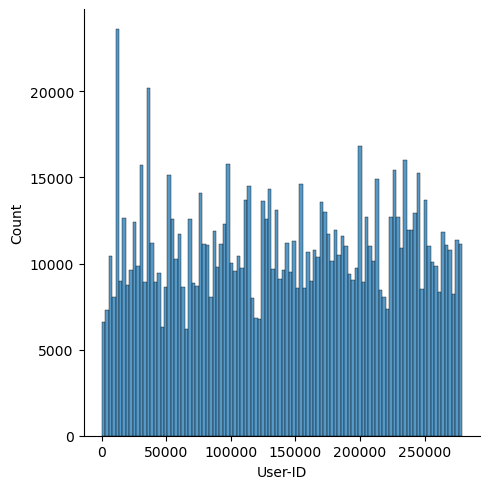

In [190]:
sns.displot(ratings,x='User-ID')
plt.show()

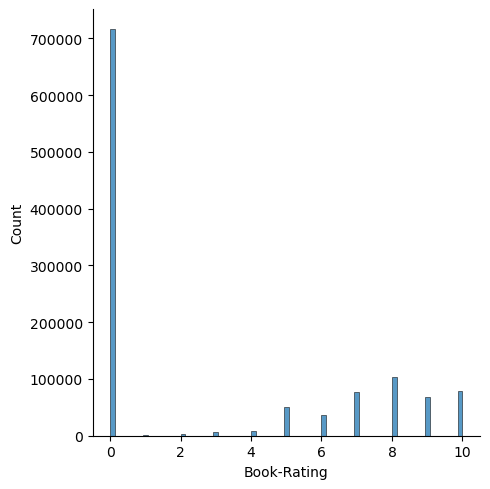

In [191]:
sns.displot(ratings,x='Book-Rating')
plt.show()

### Popularity Based Recommendation System
This type of recommendation system is based on certain formula to calculate popularity

In [192]:
book_rating = pd.merge(books,ratings,on='ISBN',how='inner')
book_rating.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,11400,0


In [193]:
rating_grp = book_rating.groupby('Book-Title').agg(
    {'User-ID':'count','Book-Rating':'mean'}).reset_index()
rating_grp.columns = ['Book-Title','Num_Rating','Avg_Rating']
rating_grp.head()

,Book-Title,Num_Rating,Avg_Rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [194]:
rating_grp.shape

(241071, 3)

In [195]:
popular_books_df = rating_grp[rating_grp['Num_Rating']>=250]
popular_books_df.shape

(186, 3)

In [196]:
popular_books_df = popular_books_df.sort_values('Avg_Rating',ascending=False)

In [199]:
popular_books_df.head()

,Book-Title,Num_Rating,Avg_Rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [200]:
popular_books_df = pd.merge(popular_books_df,
                            books,
                            on='Book-Title',
                            how='inner')[['Book-Title','Book-Author',
                                          'Avg_Rating','Image-URL-M','Num_Rating']]

In [201]:
popular_books_df.drop_duplicates(subset=['Book-Title'],inplace=True)
popular_books_df.shape

(186, 5)

In [202]:
popular_books_df.head()

,Book-Title,Book-Author,Avg_Rating,Image-URL-M,Num_Rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,5.852804,http://images.amazon.com/images/P/0439136350.0...,428
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,5.824289,http://images.amazon.com/images/P/0439139597.0...,387
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,5.737410,http://images.amazon.com/images/P/0590353403.0...,278
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,5.501441,http://images.amazon.com/images/P/043935806X.0...,347
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,5.183453,http://images.amazon.com/images/P/0439064872.0...,556


### Collaborative Filtering Based Recommender System

In [205]:
user_rating_cnt = ratings.groupby('User-ID').agg({'Book-Rating':'count'})
active_user = user_rating_cnt[user_rating_cnt['Book-Rating']>=200].index

In [206]:
active_user_rating = ratings[ratings['User-ID'].isin(active_user)]
active_user_rating.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [207]:
books_user_rating = pd.merge(books,active_user_rating,on='ISBN',how='inner')
books_user_rating.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,11676,8
1,0002005018,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,85526,0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,96054,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,http://images.amazon.com/images/P/0002005018.0...,177458,0
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,http://images.amazon.com/images/P/0374157065.0...,110912,10


In [208]:
book_rating_cnt = books_user_rating.groupby('Book-Title').agg({'User-ID':'count'})
book_rating_cnt = book_rating_cnt[book_rating_cnt['User-ID']>=50]

In [209]:
high_rating_books = book_rating_cnt.index
high_rating_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=746)

In [210]:
books_user_rating = books_user_rating[books_user_rating['Book-Title'].isin(high_rating_books)]
books_user_rating.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,User-ID,Book-Rating
7,0399135782,The Kitchen God's Wife,Amy Tan,1991,http://images.amazon.com/images/P/0399135782.0...,11676,9
8,0399135782,The Kitchen God's Wife,Amy Tan,1991,http://images.amazon.com/images/P/0399135782.0...,36836,0
9,0399135782,The Kitchen God's Wife,Amy Tan,1991,http://images.amazon.com/images/P/0399135782.0...,46398,9
10,0399135782,The Kitchen God's Wife,Amy Tan,1991,http://images.amazon.com/images/P/0399135782.0...,113270,0
11,0399135782,The Kitchen God's Wife,Amy Tan,1991,http://images.amazon.com/images/P/0399135782.0...,113519,0


In [211]:
books_user_rating.duplicated(subset=['Book-Title','User-ID']).sum()

2008

In [212]:
books_user_rating.drop_duplicates(subset=['Book-Title','User-ID'],inplace=True)

In [213]:
pivot_df = pd.pivot(data=books_user_rating,
                    columns='User-ID',
                    index='Book-Title',
                    values='Book-Rating').fillna(0)

In [214]:
pivot_df.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


In [215]:
from sklearn.metrics.pairwise import cosine_similarity

In [216]:
similarity_scores = cosine_similarity(pivot_df)

In [217]:
similarity_scores.shape

(746, 746)

In [218]:
sorted(list(enumerate(similarity_scores[0])),reverse=True,key=lambda x:x[1])[1:6]

[(54, 0.2634762509240882),
 (578, 0.24641805467078148),
 (90, 0.2427623562089166),
 (528, 0.22171768558037394),
 (321, 0.21653714990315054)]

In [219]:
np.where(pivot_df.index=='1984')

(array([0], dtype=int64),)

In [220]:
def recommend(book_name):
    # index fetch
    index = np.where(pivot_df.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),
                           key=lambda x:x[1],reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pivot_df.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [221]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Lord of the Flies',
  'William Gerald Golding',
  'http://images.amazon.com/images/P/0399501487.01.MZZZZZZZ.jpg']]

In [203]:
import pickle

In [204]:
pickle.dump(popular_books_df,open("popular_books.pkl","wb"))

In [223]:
pickle.dump(pivot_df,open("pivot_df.pkl","wb"))
pickle.dump(books,open("books.pkl","wb"))
pickle.dump(similarity_scores,open("similarity_scores.pkl","wb"))